In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd
import cv2 as cv
from skimage.transform import resize
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import Javascript

#generando imagenes binarias

Imagen original

array([0., 1.], dtype=float32)

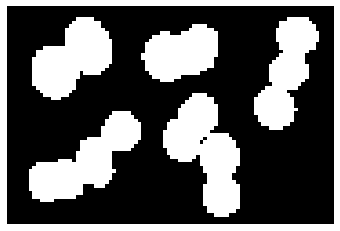

In [18]:
#Cambio de tamaño de la imagen
alto=60
ancho=90
im0= plt.imread('https://github.com/JuanDavid1703/Markov-Proyect/raw/main/Image/binaria.png')
im0= resize(im0, (alto, ancho))[:,:,0]

# Comprobación de que sea binaria
for i in range(alto):
  for j in range(ancho):
    if im0[i,j]<0.5:
      im0[i,j]=0
    else:
      im0[i,j]=1
plt.imshow(im0,cmap="gray")
plt.axis("off")
np.unique(im0)

Potenciales de energía

In [19]:
def potunary(ui,ob):
  if ui!=ob:
    return 1
  else:
    return 0

def potpair(ui,uj,t):
  return min(abs(ui-uj),t)

def energy(L,L0,t):
  E=[]
  alt=np.shape(L)[0]
  anc=np.shape(L)[1]
  for i in range(alt):
    for j in range(anc):
      if i==alt-1:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          E.append(u)
          continue
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          E.append(u+f)
      else:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          a=potpair(L[i,j],L[i+1,j],t)
          E.append(u+a)
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          a=potpair(L[i,j],L[i+1,j],t)
          d=potpair(L[i,j],L[i+1,j+1],t)
          E.append(u+(a+d+f))
  return np.sum(E)


###Algoritmo de Metrópólis y reconstrucción de la imagen a partir de una imagen ruidosa

In [32]:
#Imagen binaria inicial con valores aleatorios
i0=np.random.choice([0.0,1.0],size=(alto,ancho))
ipos=np.array(i0)

#Temeperatura inicial
T0=4

#Parámetro de regualrización
t=0.8

#Error de coincidencia inicial
error=np.sum(np.abs(im0-i0))

Ep=[]
Er=[]
x=[]

Er.append(error)
w=np.zeros((alto,ancho))
v=np.zeros((alto,ancho))
i=0

In [ ]:
while error>100 and i<30000:
  #Temepratura 1 
  T=T0*0.98**i
  pos=[int(rnd.choice(range(alto))),int(rnd.choice(range(ancho)))]
  Eant=energy(ipos,im0,t)
  v=np.array(ipos)
  if ipos[pos[0],pos[1]]==0:
    try:
      ipos[pos[0]:pos[0]+2,pos[1]:pos[1]+2]=1
    except:
      ipos[pos[0],pos[1]]=1
      ipos[pos[0]-1,pos[1]]=1
      ipos[pos[0],pos[1]-1]=1
      ipos[pos[0]-1,pos[1]-1]=1
  else:
    try:
      ipos[pos[0]:pos[0]+2,pos[1]:pos[1]+2]=0
    except:
      ipos[pos[0],pos[1]]=0
      ipos[pos[0]-1,pos[1]]=0
      ipos[pos[0],pos[1]-1]=0
      ipos[pos[0]-1,pos[1]-1]=0
  
  Epos=energy(ipos,im0,t)
  de=Epos-Eant
  if Epos<=Eant:
    w=np.array(ipos)
    x.append(w)
  elif Epos>Eant and rnd.uniform(0,1)<np.exp(-de/T):
    w=np.array(ipos)
    x.append(w)
  else:
    ipos=np.array(v)
    x.append(v)
  error=np.sum(np.abs(x[i]-im0))
  i+=1
  print(i)
  Ep.append(Epos)
  Er.append(error)

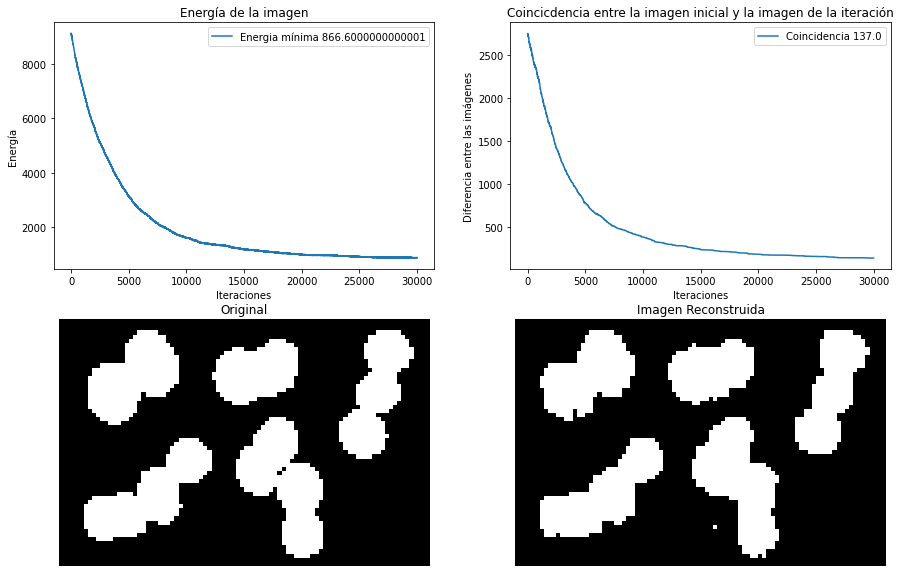

In [59]:
fig,ax=plt.subplots(2,2)
fig.set_size_inches(15,10)
#fig.tight_layout(pad=0.5)

ax[0,0].plot(Ep, label=f"Energia mínima {min(Ep)}")
ax[0,0].set_xlabel("Iteraciones")
ax[0,0].set_ylabel("Energía")
ax[0,0].legend()
ax[0,0].set_title("Energía de la imagen")

ax[0,1].plot(Er, label=f"Coincidencia {min(Er)}")
ax[0,1].set_xlabel("Iteraciones")
ax[0,1].set_ylabel("Diferencia entre las imágenes")
ax[0,1].legend()
ax[0,1].set_title("Coincicdencia entre la imagen inicial y la imagen de la iteración")


ax[1,0].imshow(im0,cmap="gray")
ax[1,0].set_title("Original")
ax[1,0].axis("off")

ax[1,1].imshow(x[i-1],cmap="gray")
ax[1,1].axis("off")
ax[1,1].set_title("Imagen Reconstruida")

plt.show()

####Animación

In [60]:
%%capture
fig,ax = plt.subplots();
def animate(i):
       ax.clear()
       ax.set_axis_off()
       ax.imshow(x[100*i],cmap="gray")
ani = animation.FuncAnimation(fig,animate,frames=300,interval=50,blit=False)
rc('animation', html='jshtml')

In [61]:
Javascript('document.querySelector(".anim-state").state.value="once" ')
Javascript('document.querySelector(".anim-controls > button:nth-child(6)").click()')
ani

In [62]:
ani.save("Binariaseg.mp4")